In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd

df=pd.read_csv('../data/highly_relevant_posts_descending_threshold_50_augmented.csv')
df_Sertraline = pd.read_csv('../data/Sertraline_sentiments_4o.csv')

In [6]:
import json

# Function to extract sentiment and reason from the JSON-like string
def extract_sentiment_reason(json_str):
    # Remove the enclosing ```json ``` and any leading/trailing whitespace
    json_str = json_str.strip("```json ").strip()
    try:
        # Parse the JSON string
        parsed_json = json.loads(json_str)
        sentiment = parsed_json.get("sentiment", "")
        reason = parsed_json.get("reason", "")
        return pd.Series([sentiment, reason])
    except json.JSONDecodeError:
        # Return empty values if JSON parsing fails
        return pd.Series(["", ""])

# Apply the function to the 'response_Lamotrigine' column
df_Sertraline[['sentiment', 'reason']] = df_Sertraline['reponse_Sertraline'].apply(extract_sentiment_reason)


In [7]:
df_Sertraline.head()

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,reponse_Sertraline,sentiment,reason
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",1602953594,False,BPD,2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.0,"['Alprazolam', 'Amitriptyline', 'Aripiprazole'...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,There is not enough information to make a conc...
1,Does anyone have any experience(s) with any an...,"i abused benzodiazepines, so i cannot trust my...",1444617385,False,BPD,2015-10-12 02:36:25,Does anyone have any experience(s) with any an...,anyone experience anxiolytic medicine besides ...,1.0,"['Citalopram', 'Desvenlafaxine', 'Duloxetine',...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,There is not enough information to make a conc...
2,How did antidepressants modify your behavior a...,"hello, i'd like to know :\n\n1) if you've been...",1580496436,False,BPD,2020-01-31 18:47:16,How did antidepressants modify your behavior a...,antidepressant modify behavior cognition hello...,1.0,"['Aripiprazole', 'Brexpiprazole', 'Escitalopra...","```json\n{\n ""sentiment"": ""-1"",\n ""reason"": ...",-1,"The poster experienced intense mood swings, an..."
3,Medication,"i've never posted in this sub before, but i lo...",1475113777,False,BPD,2016-09-29 01:49:37,Medication i've never posted in this sub befor...,medication ive never posted sub love read ever...,1.0,"['Bupropion', 'Clonazepam', 'Dextroamphetamine...","```json\n{\n ""sentiment"": ""-1"",\n ""reason"": ...",-1,Did nothing for the poster's condition.
4,New doctor wants me to go off antidepressants ...,**tl;dr** i am not seeking medical advice. a d...,1467811036,False,BPD,2016-07-06 13:17:16,New doctor wants me to go off antidepressants ...,new doctor want go antidepressant even though ...,1.0,"['Methylphenidate', 'Sertraline', 'Vortioxetine']","```json\n{\n ""sentiment"": ""1"",\n ""reason"": ""...",1,The poster took Sertraline (Zoloft) from Octob...


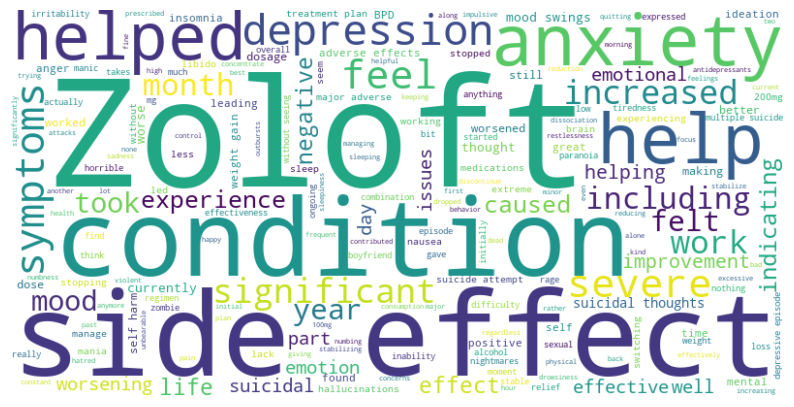

In [14]:
from wordcloud import WordCloud, STOPWORDS

df_taken = df_Sertraline[df_Sertraline['sentiment'] != '-']

# Combine the 'combined_text' of those rows
combined_text = " ".join(df_taken['reason'])

# Define additional stopwords if needed
stopwords = set(STOPWORDS)
additional_stopwords = {"medication", "Sertraline", "poster", "taking", "seeking","mention","experienced","although","mentioned","despite","starting","mentions","enough","information","provide","make","made","yet","feeling","conclusion"}  # Adding custom stopwords.
stopwords.update(additional_stopwords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title(f"Word Cloud for {most_frequent_medication}", fontsize=20)
plt.show()

wordcloud.to_file('Sertraline_sentiments.png')

In [23]:
# Count the occurrences of each sentiment value
sentiment_counts = df_taken['sentiment'].value_counts()
print(sentiment_counts)

sentiment
-1    121
1     107
0       7
Name: count, dtype: int64


In [10]:
df_check = df_taken[df_taken['sentiment']=='']

In [11]:
df_check.head()

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,reponse_Sertraline,sentiment,reason
150,my stepdad wants me to get off my medication,"he doesn’t like diagnoses, he thinks it can be...",1562987865,False,BPD,2019-07-13 03:17:45,my stepdad wants me to get off my medication h...,stepdad want get medication doesn’t like diagn...,0.944555,"['Aripiprazole', 'Sertraline']","{\n 'sentiment': '-1',\n 'reason': 'The post...",,
225,Mood Stabilizers...,currently sat in the cold (only place i have s...,1575459112,False,BPD,2019-12-04 11:31:52,Mood Stabilizers... currently sat in the cold ...,mood stabilizer currently sat cold place signa...,0.860753,['Sertraline'],"{\n 'sentiment': '-1',\n 'reason': 'The post...",,
239,Psychotic Depression,!!!!!!!! cw: suici*e\n\nhi! do any of happen t...,1595631237,False,BPD,2020-07-24 22:53:57,Psychotic Depression !!!!!!!! cw: suici*e\n\nh...,psychotic depression cw suicie hi happen suffe...,0.849088,"['Bupropion', 'Quetiapine', 'Sertraline']","```python\n{\n 'sentiment': '-',\n 'reas...",,
317,Sertraline and night sweats,im currently on section 3 in hospital. they’ve...,1522080367,False,BPD,2018-03-26 16:06:07,Sertraline and night sweats im currently on se...,sertraline night sweat im currently section 3 ...,0.702785,['Sertraline'],"{\n 'sentiment': '-1',\n 'reason': 'The post...",,


In [13]:
df_Sertraline.sentiment[150] = '-1'
df_Sertraline.sentiment[225] = '-1'
df_Sertraline.sentiment[239] = '-'
df_Sertraline.sentiment[317] = '-1'

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_35227/827759342.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_Sertraline.sentiment[150] = '-1'
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_35227/827759342.py:

In [15]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

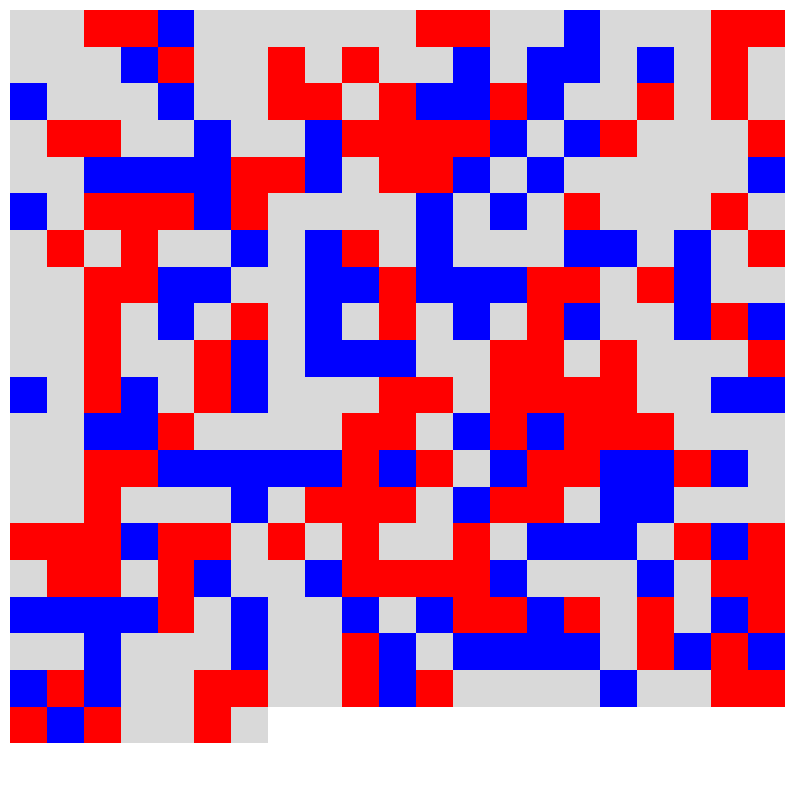

In [20]:
from matplotlib.colors import to_rgba


# Function to convert sentiment to RGBA color
def sentiment_to_rgba(sentiment):
    if sentiment == '1':
        return to_rgba('blue')
    elif sentiment == '-1':
        return to_rgba('red')
    elif sentiment == '0':
        return to_rgba('gray')
    elif sentiment == '-':
        return to_rgba('gray', alpha=0.3)
    return to_rgba('white')

#Since '0's and '-'s aren't often classified correctly, I'm going to merge those for the plots

# Extract the colors based on the sentiment values
colors = np.array([sentiment_to_rgba(sentiment) for sentiment in df_Sertraline['sentiment']])

# Number of squares (posts)
num_posts = len(df_Sertraline)

# Determine grid size for the plot
grid_size = int(np.ceil(np.sqrt(num_posts)))

# Create a grid of colors
color_grid = np.full((grid_size * grid_size, 4), to_rgba('white'), dtype=float)  # 4 for RGBA
color_grid[:num_posts] = colors

# Reshape to 2D grid for plotting
color_grid = color_grid.reshape((grid_size, grid_size, 4))

# Plot the grid of colors
plt.figure(figsize=(10, 10))
plt.imshow(color_grid, aspect='auto')
plt.axis('off')
#plt.title('Sentiments of Lamotrigine Posts')
plt.savefig('Sertraline_sentiment_representation.png', bbox_inches='tight', pad_inches=0.1)
plt.show()




In [22]:
# Define the order for sorting sentiments
sentiment_order = {'1': 0, '0': 1, '-': 2, '-1': 3}

# Add a column to sort by sentiment
df_Sertraline['sentiment_order'] = df_Sertraline['sentiment'].map(sentiment_order)

# Sort the DataFrame by sentiment order
sorted_df = df_Sertraline.sort_values(by='sentiment_order').drop(columns='sentiment_order').reset_index(drop=True)


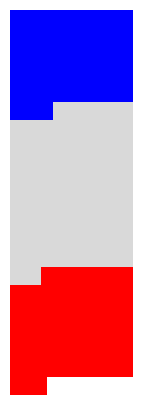

In [21]:
# Extract the colors based on the sentiment values
colors = np.array([sentiment_to_rgba(sentiment) for sentiment in sorted_df['sentiment']])

# Number of squares (posts)
num_posts = len(sorted_df)

# Determine grid size for the plot
grid_height = int(np.ceil(np.sqrt(num_posts)))
grid_width = int(np.ceil(num_posts / grid_height))

# Create a grid of colors
color_grid = np.full((grid_height * grid_width, 4), to_rgba('white'), dtype=float)  # 4 for RGBA
color_grid[:num_posts] = colors

# Reshape to 2D grid for plotting
color_grid = color_grid.reshape((grid_height, grid_width, 4))

# Plot the grid of colors
plt.figure(figsize=(15, 5))  # Width: 15 inches, Height: 5 inches
plt.imshow(color_grid, aspect=3/1)  # Set aspect ratio to 3:1
plt.axis('off')
#plt.title('Sentiment Representation for Lamotrigine Posts')
plt.savefig('Sertraline_sentiment_representation_ordered.png', bbox_inches='tight', pad_inches=0.1)
plt.show()